# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [19]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
        time.sleep(1)

# Indicate that Data Loading is complete
        print("-----------------------------")
        print("Data Retrieval Complete      ")
        print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san luis de la loma
Processing Record 2 of Set 1 | burao
Processing Record 3 of Set 1 | malango
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | udachny
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | bac lieu
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | sal rei
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | saint-pierre
Processing Record 13 of Set 1 | atafu village
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | sydney
Processing Record 16 of Set 1 | kingscliff
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | salinas
Processing Record 19 of Set 1 | al kharijah
Processing Record 20 o

In [21]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [51]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san luis de la loma,17.2706,-100.8939,83.80,69,97,6.31,MX,1731519942
1,burao,9.5221,45.5336,68.29,43,0,8.90,SO,1731520121
2,malango,-2.9627,119.9001,64.94,97,34,2.86,ID,1731520122
3,adamstown,-25.0660,-130.1015,71.26,78,100,8.68,PN,1731519841
4,udachny,66.4167,112.4000,-19.88,99,63,5.91,RU,1731520124


In [53]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [55]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san luis de la loma,17.2706,-100.8939,83.80,69,97,6.31,MX,1731519942
1,burao,9.5221,45.5336,68.29,43,0,8.90,SO,1731520121
2,malango,-2.9627,119.9001,64.94,97,34,2.86,ID,1731520122
3,adamstown,-25.0660,-130.1015,71.26,78,100,8.68,PN,1731519841
4,udachny,66.4167,112.4000,-19.88,99,63,5.91,RU,1731520124


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

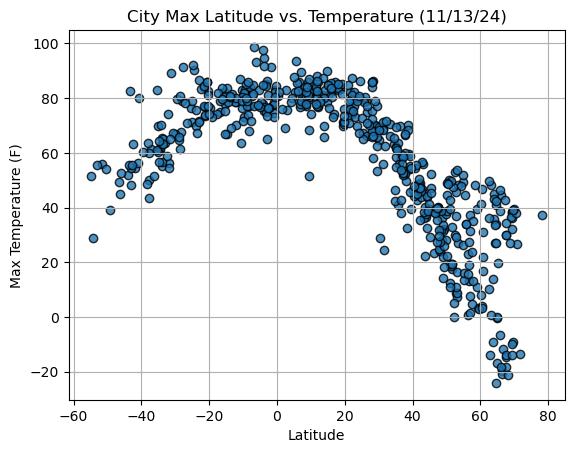

In [45]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

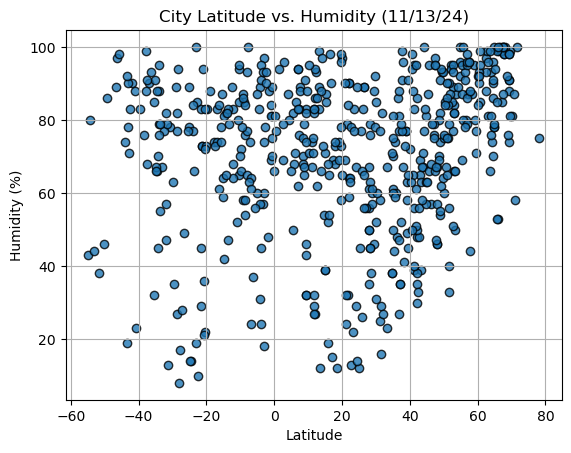

In [59]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

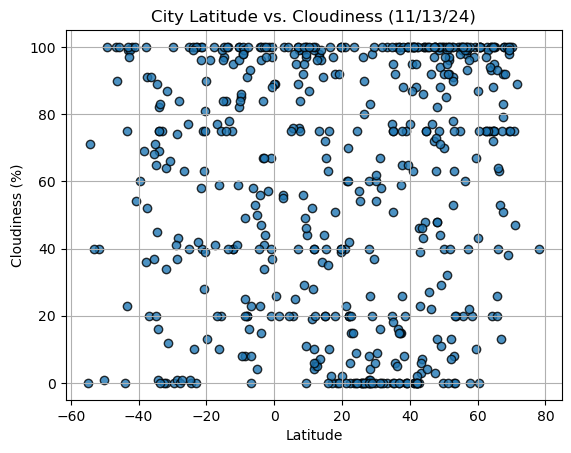

In [61]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

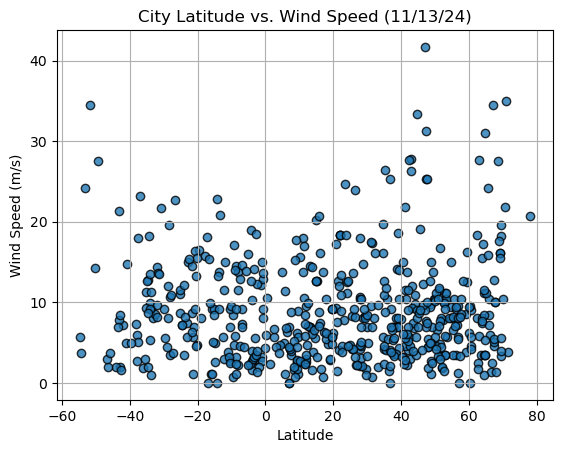

In [65]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [86]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, title, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

SyntaxError: incomplete input (1241068999.py, line 2)

In [73]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san luis de la loma,17.2706,-100.8939,83.80,69,97,6.31,MX,1731519942
1,burao,9.5221,45.5336,68.29,43,0,8.90,SO,1731520121
4,udachny,66.4167,112.4000,-19.88,99,63,5.91,RU,1731520124
5,bethel,41.3712,-73.4140,47.73,39,0,10.36,US,1731519943
6,bac lieu,9.2850,105.7244,79.30,83,11,6.17,VN,1731519943


In [75]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,malango,-2.9627,119.9001,64.94,97,34,2.86,ID,1731520122
3,adamstown,-25.0660,-130.1015,71.26,78,100,8.68,PN,1731519841
7,blackmans bay,-43.0167,147.3167,48.33,78,99,1.99,AU,1731520127
9,bredasdorp,-34.5322,20.0403,61.16,66,45,12.82,ZA,1731519943
10,saint-pierre,-21.3393,55.4781,76.68,73,40,1.14,RE,1731520132


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8602128974018506


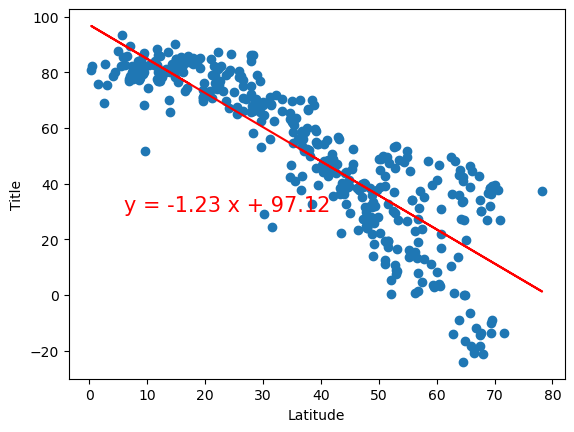

In [90]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear_regression(x_values, y_values, "Max Temp", (6, 30))



The r-squared is: 0.7304989657853705


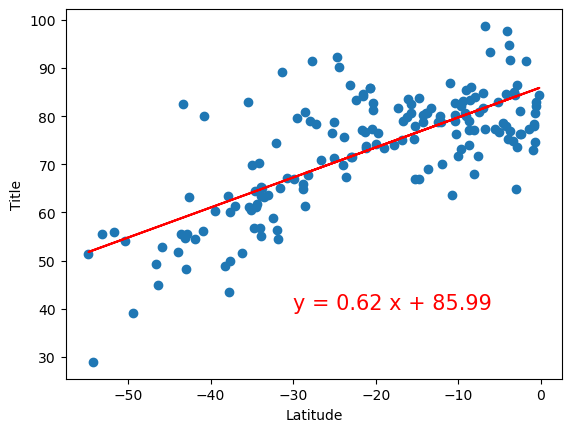

In [94]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
linear_regression(x_values,y_values, 'Max Temp', (-30,40))


**Discussion about the linear relationship:** : The closer to the equator, the higher the temp.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.3011681263698214


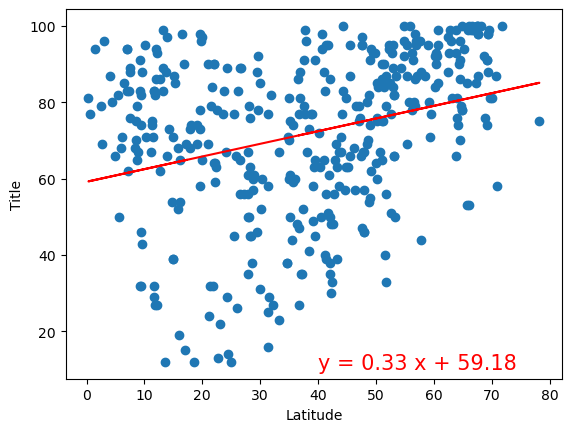

In [99]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.03397169875993409


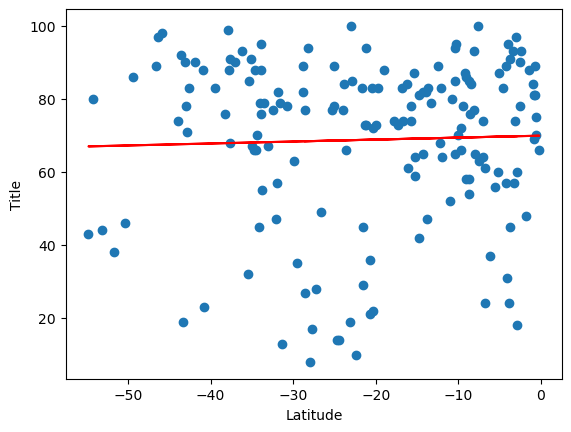

In [101]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.22859971787382552


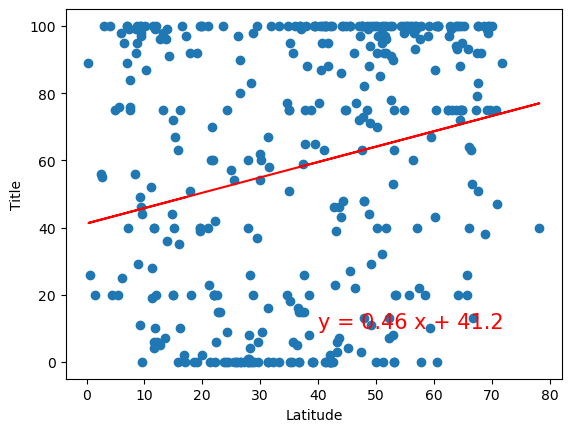

In [103]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.06057686457339447


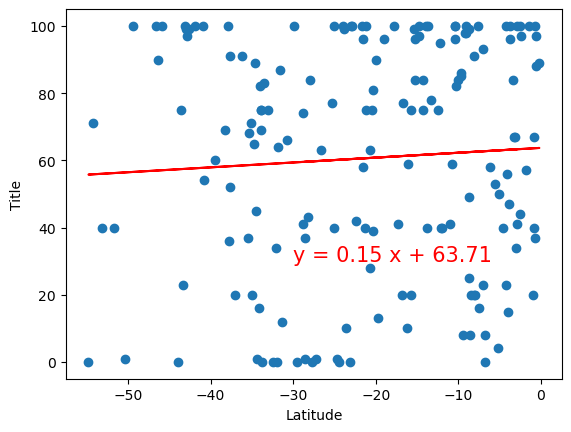

In [105]:
# Southern Hemisphere

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
linear_regression(x_values,y_values, 'Cloudiness', (-30,30))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.16027052435542685


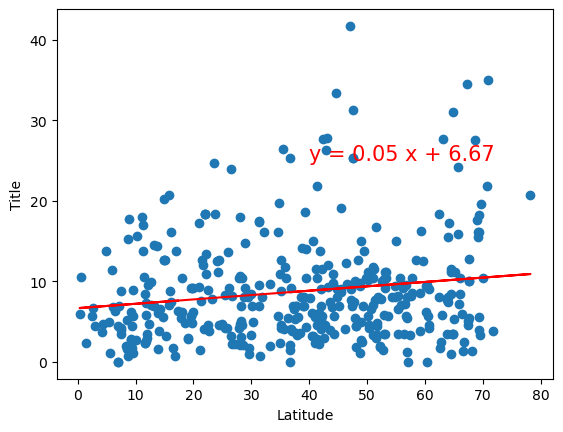

In [109]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
linear_regression(x_values,y_values, 'Windspeed', (40,25))

The r-squared is: -0.15482564145840141


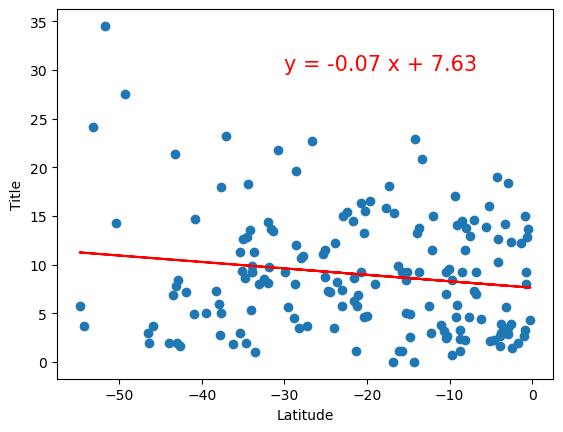

In [113]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
linear_regression(x_values,y_values, 'Windspeed', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE